# HOUSE PRICE PREDICTION PROJECT:

In [102]:
#Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore all warnings:
import warnings
warnings.filterwarnings("ignore")

In [103]:
#Import the dataset:
data = pd.read_csv("dataset.csv")

### get a general information about the dataset:

In [104]:
print("No. of rows X columns = ",data.shape)
data.info()
round(data.describe(),2)


No. of rows X columns =  (14619, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house               

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,...,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00,14619.00
mean,6.762821e+09,42604.55,3.38,2.13,2098.16,15093.69,1.50,0.01,0.23,3.43,...,1970.93,90.93,122033.06,52.79,-114.40,1996.64,12754.00,2.01,64.95,538806.28
std,6.237160e+03,67.34,0.94,0.77,928.22,37920.89,0.54,0.09,0.77,0.66,...,29.49,416.23,19.08,0.14,0.14,691.08,26059.23,0.82,8.94,367229.36
min,6.762810e+09,42491.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,...,1900.00,0.00,122003.00,52.39,-114.71,460.00,651.00,1.00,50.00,78000.00
25%,6.762815e+09,42546.00,3.00,1.75,1440.00,5010.50,1.00,0.00,0.00,3.00,...,1951.00,0.00,122017.00,52.71,-114.52,1490.00,5097.50,1.00,57.00,320000.00
50%,6.762821e+09,42600.00,3.00,2.25,1930.00,7620.00,1.50,0.00,0.00,3.00,...,1975.00,0.00,122032.00,52.81,-114.42,1850.00,7620.00,2.00,65.00,450000.00
75%,6.762826e+09,42662.00,4.00,2.50,2570.00,10800.00,2.00,0.00,0.00,4.00,...,1997.00,0.00,122048.00,52.91,-114.32,2380.00,10125.00,3.00,73.00,645000.00
max,6.762832e+09,42734.00,33.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,...,2015.00,2015.00,122072.00,53.01,-113.50,6110.00,560617.00,3.00,80.00,7700000.00


In [105]:
print("Sample 5 entries of data: ")
data.sample(5)

Sample 5 entries of data: 


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
3338,6762826256,42543,4,1.50,1890,43560,1.0,0,0,4,...,1974,0,122023,52.5567,-114.356,2376,5820,1,68,320000
7456,6762818993,42602,3,2.00,1500,2500,2.0,0,0,3,...,2002,0,122026,52.9048,-114.575,1550,5000,2,58,505000
10164,6762830891,42648,3,1.00,1090,17630,1.0,0,0,4,...,1962,0,122072,52.5180,-114.386,1300,12000,3,67,197000
12782,6762813696,42693,4,2.50,2370,2971,2.0,0,2,3,...,2008,0,122033,52.9364,-114.414,2970,7500,2,52,749950
10668,6762813432,42657,4,2.75,2660,4500,1.5,0,0,5,...,1909,0,122028,52.9164,-114.537,1830,4000,1,61,765000


In [106]:
print("First 5 entries of data: ")
data.head()

First 5 entries of data: 


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [107]:
print("Last 5 entries of data: ")
data.tail()

Last 5 entries of data: 


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14614,6762830250,42734,2,1.5,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.0,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.0,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.0,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14618,6762831463,42734,3,1.0,900,4770,1.0,0,0,3,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [108]:
#Check for any null-values in each column:
result = data.isna().sum().reset_index()
result.columns=["Column-name","No. of null values"]
print(result)

print("\n\n\n")

#check for any duplicated values:
result = data.duplicated().sum()
print("No. of duplicated values = ",result)

                              Column-name  No. of null values
0                                      id                   0
1                                    Date                   0
2                      number of bedrooms                   0
3                     number of bathrooms                   0
4                             living area                   0
5                                lot area                   0
6                        number of floors                   0
7                      waterfront present                   0
8                         number of views                   0
9                  condition of the house                   0
10                     grade of the house                   0
11  Area of the house(excluding basement)                   0
12                   Area of the basement                   0
13                             Built Year                   0
14                        Renovation Year                   0
15      

### EDA:

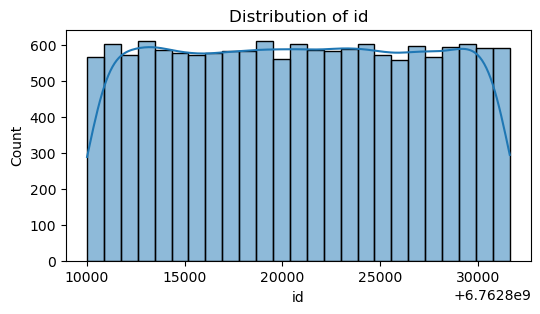

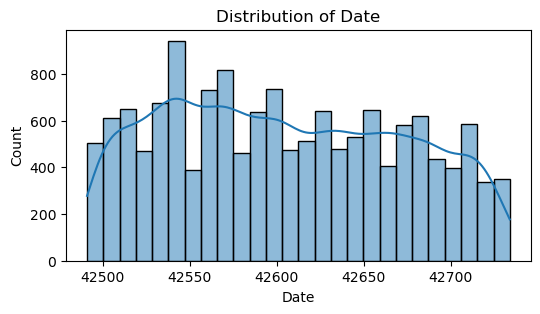

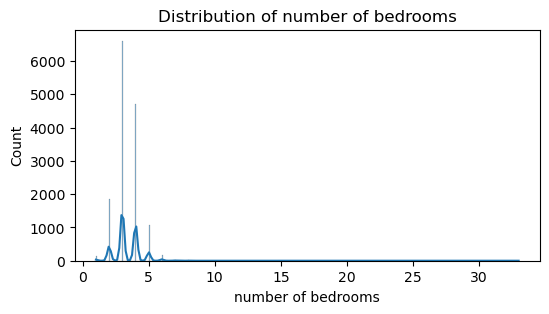

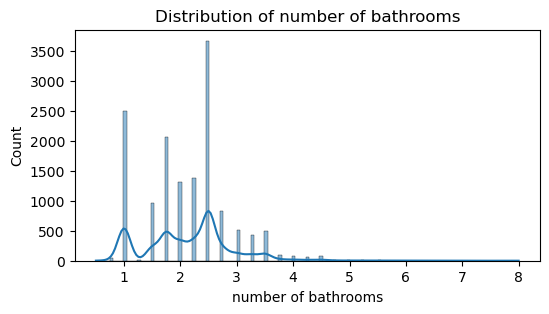

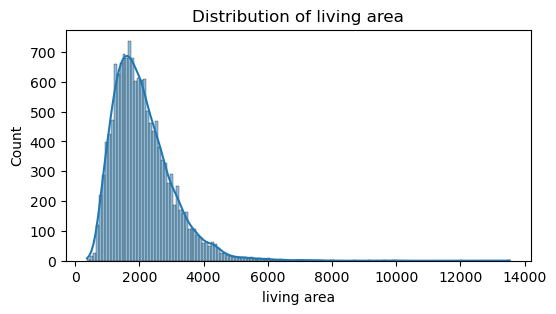

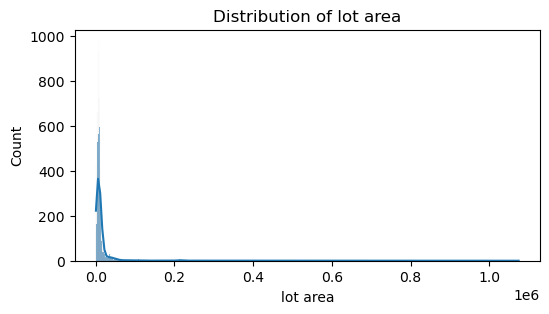

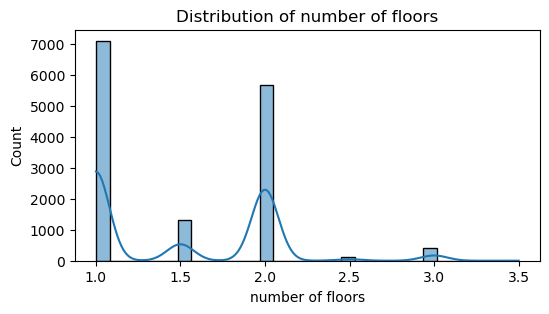

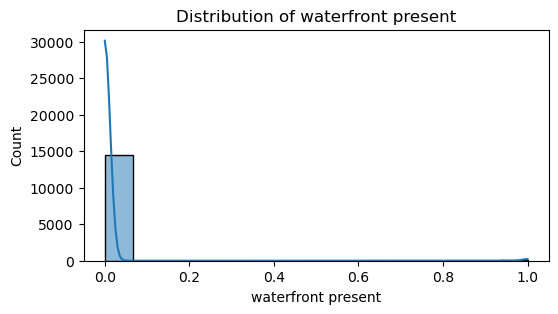

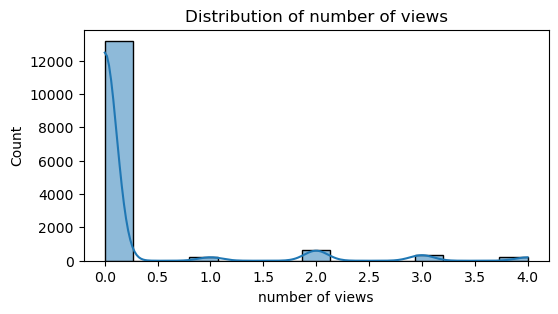

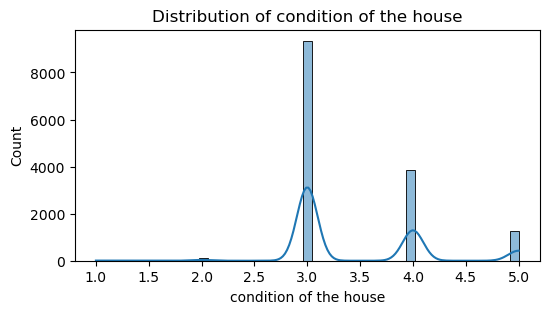

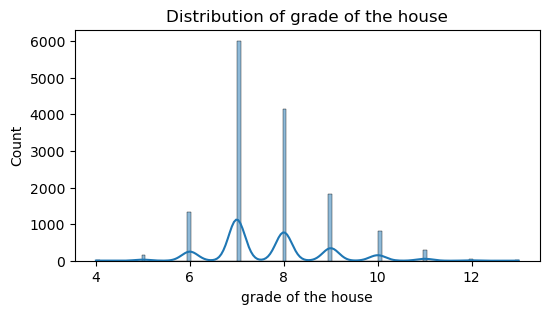

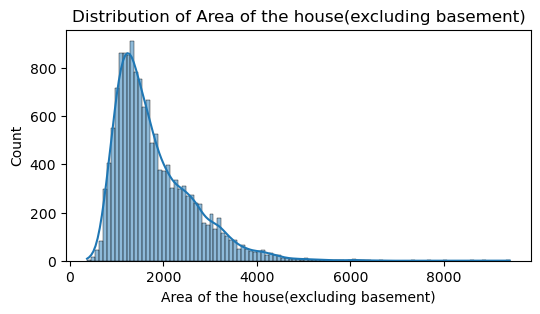

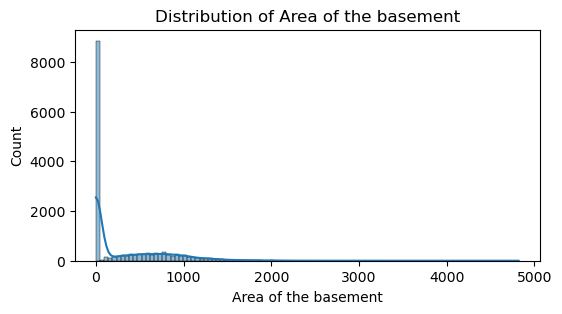

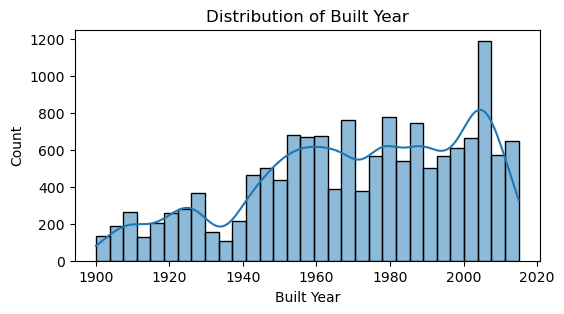

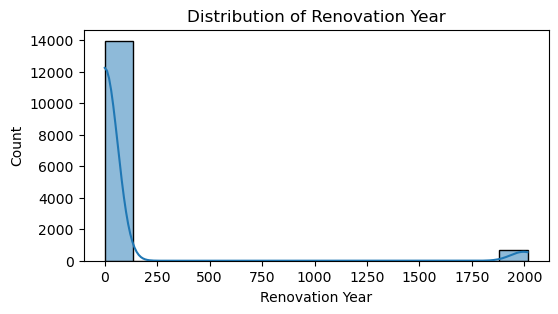

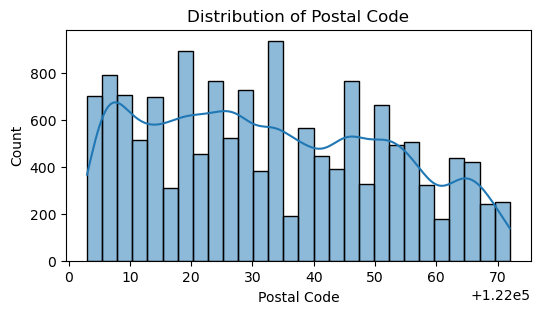

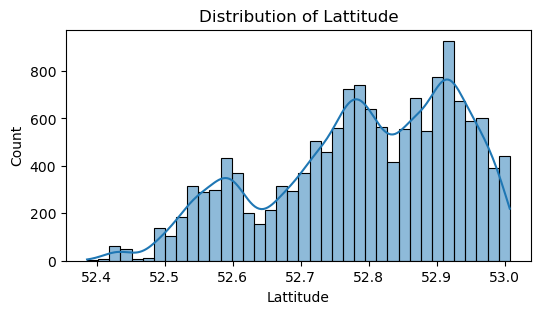

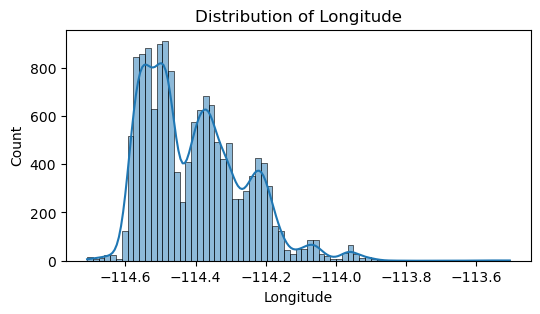

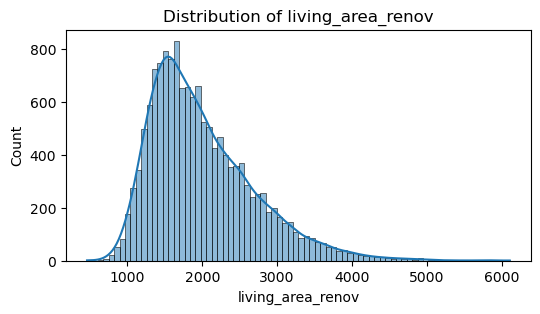

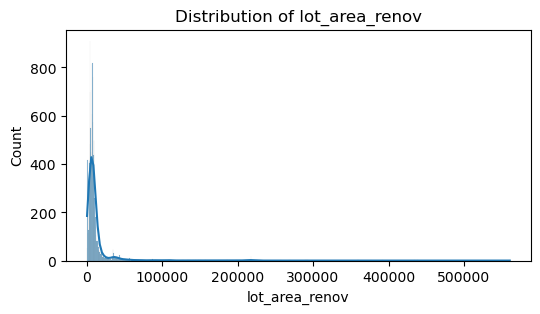

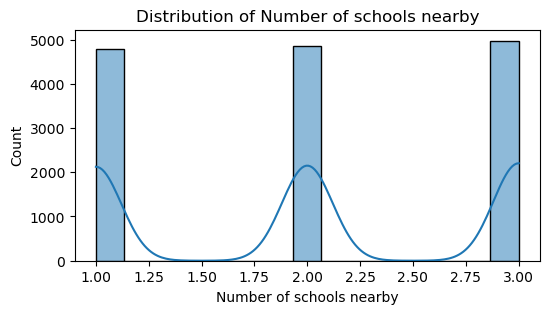

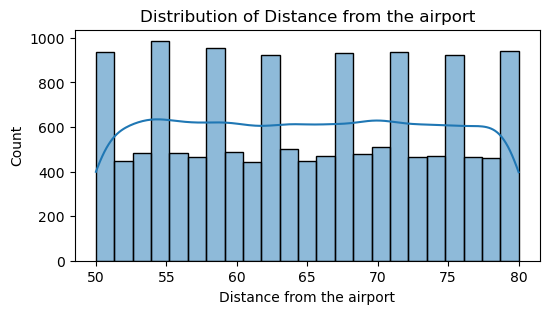

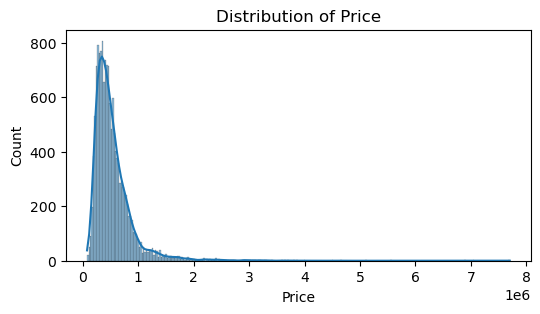

In [109]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

  


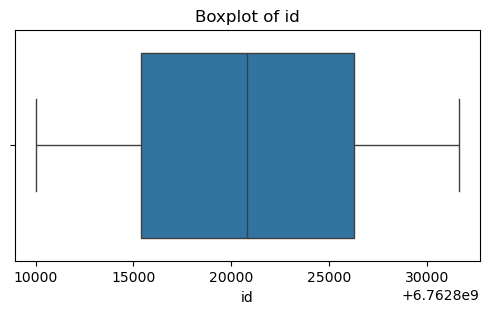

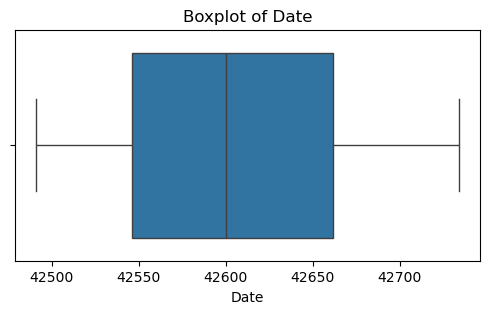

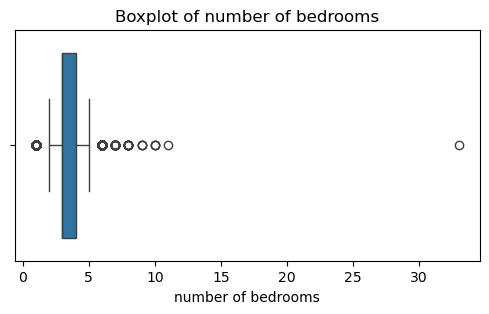

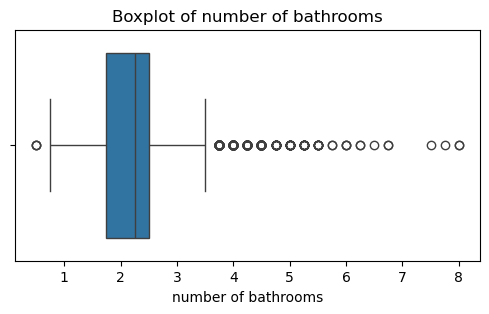

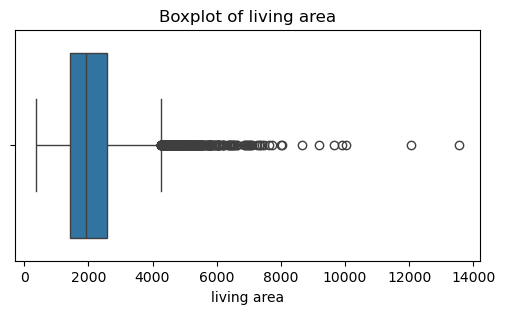

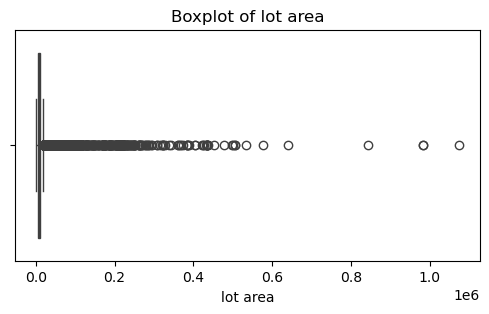

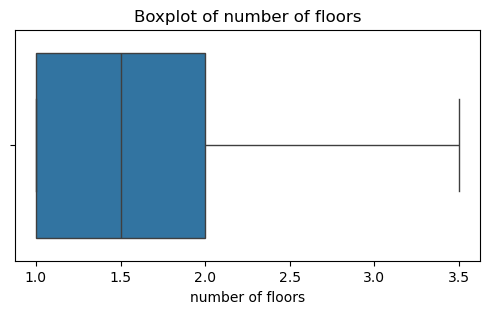

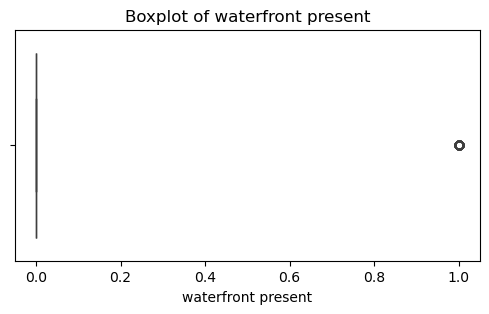

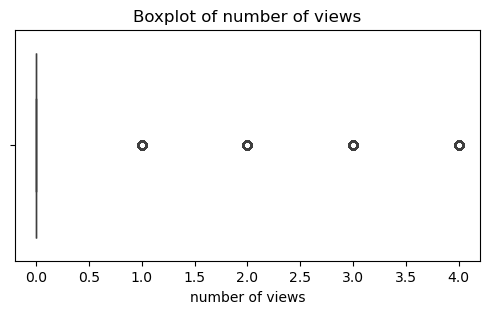

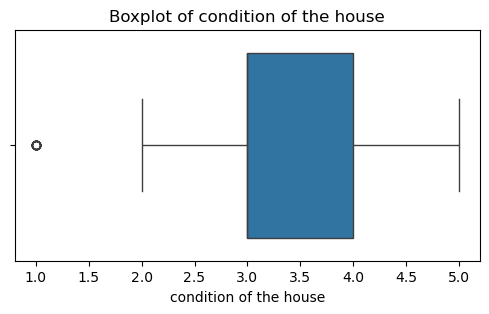

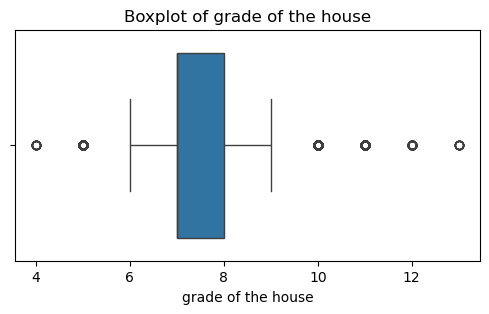

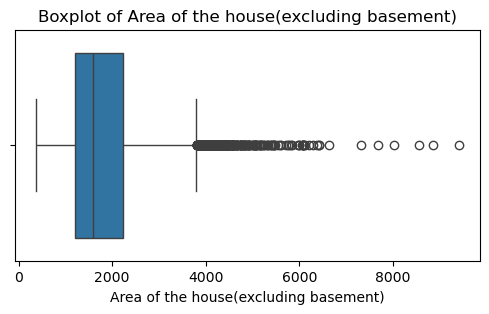

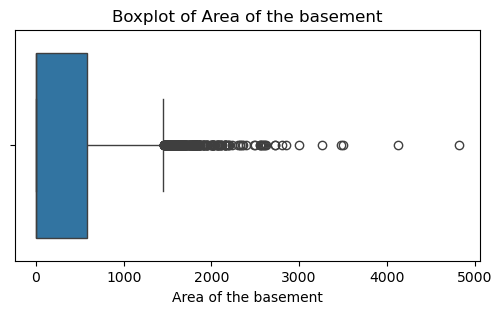

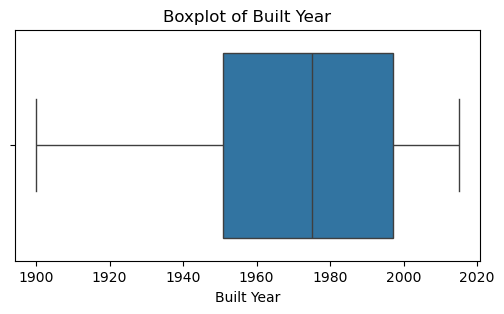

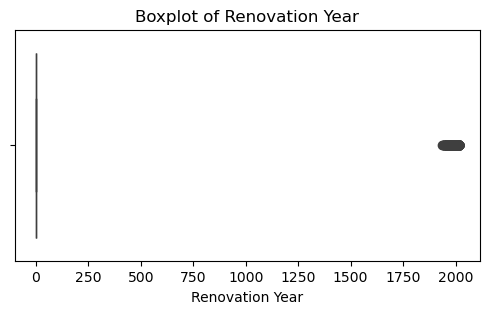

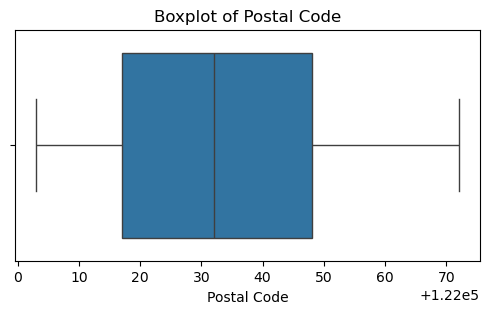

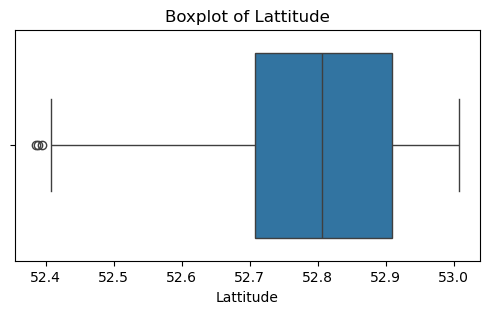

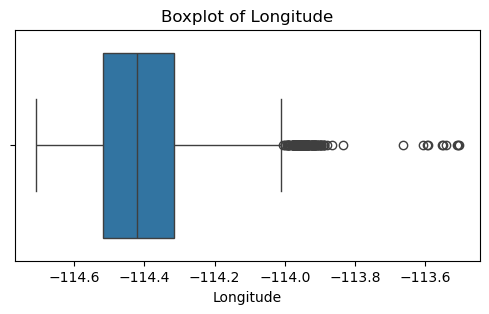

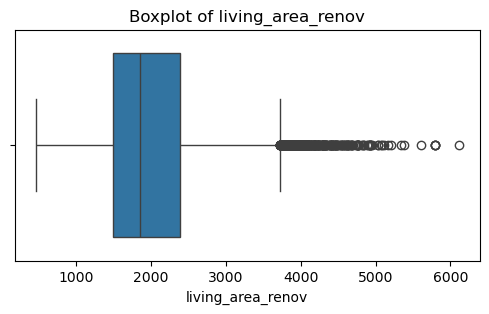

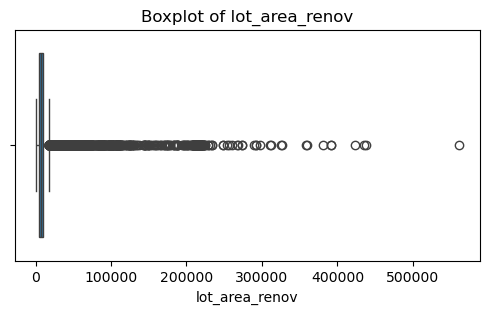

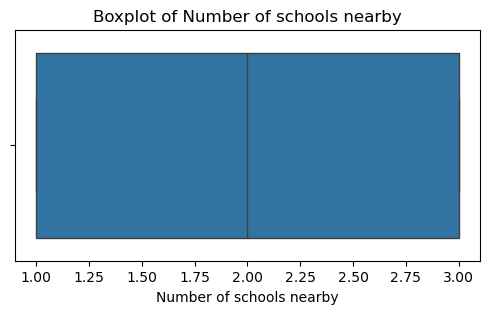

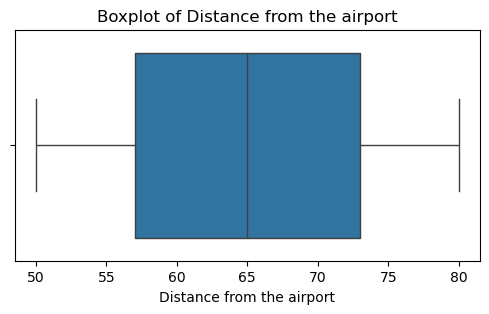

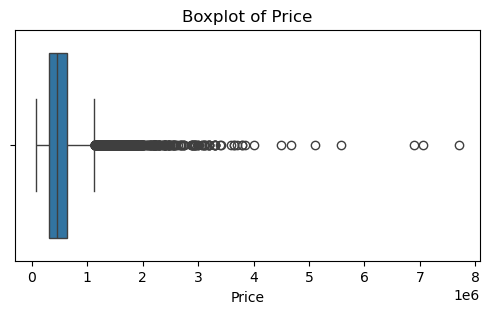

In [110]:
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


#### Now check the relationship between:
- Condition of the house
- Price of the house (on average)

<Axes: xlabel='condition of the house', ylabel='Price'>

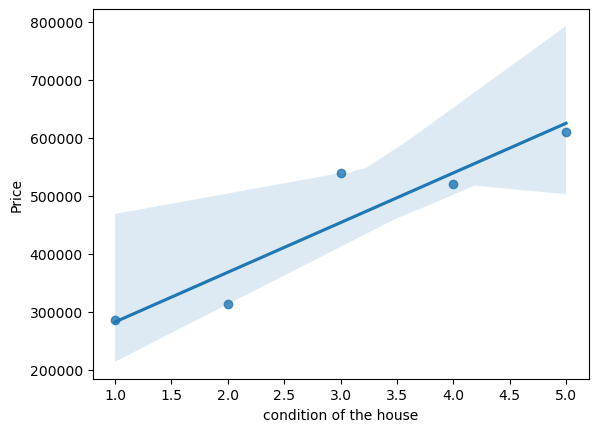

In [111]:
df = data.groupby("condition of the house")["Price"].mean().reset_index().sort_values(by="Price")
sns.regplot(x="condition of the house",y="Price",data=df)



### _conclusion at this point:
- Houses in proper condition are costly.
- Whereas; houses (not in proper condition) are cheap.

In [112]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


### ML QUESTIONS:

### Q1] Predict house-prices based on:
- Number of bedrooms
- Numbers of bathrooms
- Living area
- Condition of the house

In [113]:
X = data[["number of bedrooms","number of bathrooms","living area","condition of the house"]]
y = data[["Price"]]

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
param_grid = {
    "criterion" : ["squared_error","friedman_mse","absolute_error"],
    "splitter" : ["best","random"],
    "max_depth": [None, 10,20,30,40,50],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

tree_model = DecisionTreeRegressor()
grid_tree= GridSearchCV(estimator = tree_model, param_grid = param_grid)
grid_tree.fit(X_train, y_train)


,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [115]:
#Check the performance of this model:

##but first make the predictions for the testing-dataset:
tree_preds = grid_tree.predict(X_test)
print(tree_preds)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, tree_preds)

[355495.67315175 522026.90358744 238611.75555556 ... 353295.83333333
 539271.16622691 421135.27925532]


61623684399.663

In [116]:
###Now make the predictions and check the performance of the linear-regression model:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


predslr = lr.predict(X_test) #predictions for the testing data using linear-regression
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predslr)

60576794781.62602

In [117]:
### Now for both the models check the mean_absolute_error values:
from sklearn.metrics import mean_absolute_error
print("For GridSearchCV: ",mean_absolute_error(y_test, tree_preds))
print("For LinearRegression: ",mean_absolute_error(y_test, predslr))


For GridSearchCV:  161548.44850459037
For LinearRegression:  165031.71973815977


In [118]:
#Now make the predictions using Random-forest model:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridrfr = {
    "max_depth": [5,10,15],
    "n_estimators":[2,3,4,5,6,7,8,9,10]
}

gridrfr = GridSearchCV(rfrmodel,param_gridrfr)
gridrfr.fit(X_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,8


In [119]:
rfrpredictions = gridrfr.predict(X_test)
mean_absolute_error(y_test,rfrpredictions)

157897.00309501652

In [121]:
### Now for all the models check the mean_absolute_error values:
from sklearn.metrics import mean_absolute_error
print("For GridSearchCV: ",mean_absolute_error(y_test, tree_preds))
print("For LinearRegression: ",mean_absolute_error(y_test, predslr))
print("For Random-Forest: ",mean_absolute_error(y_test, rfrpredictions))



For GridSearchCV:  161548.44850459037
For LinearRegression:  165031.71973815977
For Random-Forest:  157897.00309501652


In [122]:
#Save your random-forest model on your system:
import joblib
joblib.dump(gridrfr,"model.pkl")

['model.pkl']